In [6]:
# Import the single label vandalism classifier
from ipynb.fs.full.single_label_vandalism_detector import \
    feature_importance, feature_labels, X_train, y_train

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # not used directly (import with side-effect)
from sklearn.manifold import TSNE

## TSNE

According to the [TNSE documentation](https://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler), the `learning_rate` parameter is pretty signifacant to the result. If too low, a cloudy shape with few outliers may appear, and if to high, it can be a ball shape, respectively.

In [2]:
importance_threshold = 0.04
indices = np.where(feature_importance > importance_threshold)[0]
feature_names = feature_labels[indices]
to_embed = X_train[feature_names]
feature_names

Index(['isContributorAnonymous', 'commentLength', 'sizeChange',
       'timeSinceLastArticleEditBySameContributor',
       'ratioOffAllEditsToContributorEdits'],
      dtype='object')

In [3]:
colors = pd.Series(y_train).map(lambda x: ('blue', 'orange')[x])

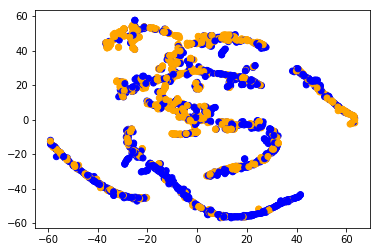

In [4]:
# Two-dimensional TSNE
tsne2 = TSNE(n_components=2, learning_rate=150)
x_embed2 = tsne2.fit_transform(to_embed)
plt.scatter(x_embed2[:, 0],
            x_embed2[:, 1],
            color=colors)
plt.show()

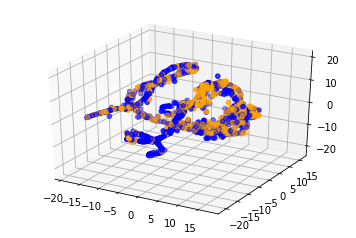

In [5]:
# Three-dimensional TSNE
tsne3 = TSNE(n_components=3, learning_rate=150)
x_embed3 = tsne3.fit_transform(to_embed)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x_embed3[:, 0],
           ys=x_embed3[:, 1],
           zs=x_embed3[:, 2],
           c=colors)
plt.show()